In [181]:
# Assignment: Matplotlib and Pandas Visualization

## Imports

In [182]:
import matplotlib.pyplot as plt 
import pandas as pd

## Loading the datasets

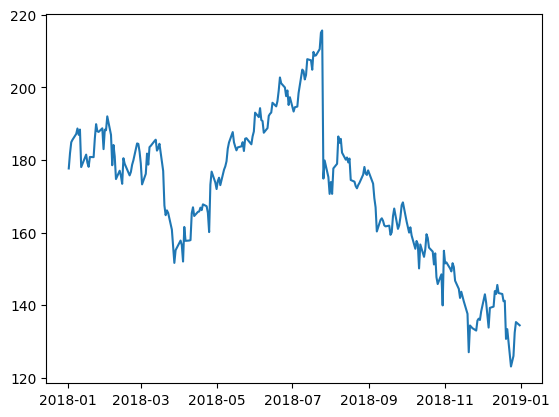

In [183]:
fb = pd.read_csv(
    'Datasets/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)
plt.show()

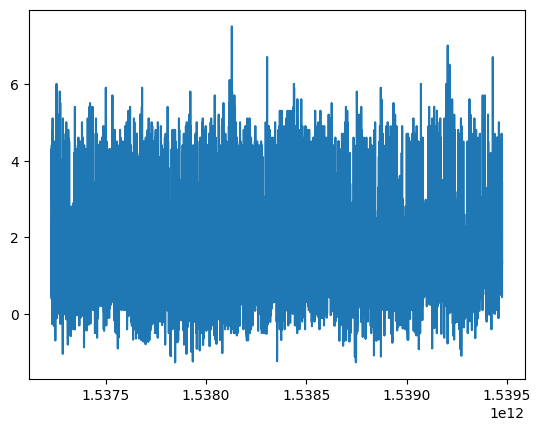

In [184]:
eq = pd.read_csv(
    'Datasets/earthquakes.csv', index_col='time'
)

plt.plot(eq.index, eq.mag)
plt.show()

## Cleaning the Datasets

Removing nulls

In [185]:
fb.isnull().sum()
eq.isnull().sum()

mag             1
magType         1
place           0
tsunami         0
parsed_place    0
dtype: int64

Removing missing data

In [186]:
fb.dropna()
fb.dropna(axis=1)

eq.dropna()
eq.dropna(axis=1)

,place,tsunami,parsed_place
time,,,
1539475168010,"9km NE of Aguanga, CA",0,California
1539475129610,"9km NE of Aguanga, CA",0,California
1539475062610,"8km NE of Aguanga, CA",0,California
1539474978070,"9km NE of Aguanga, CA",0,California
1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...
1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
1537230135130,"3km W of Julian, CA",0,California
1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico


Removing duplicates

In [187]:
fb.duplicated().sum()
eq.duplicated().sum()

848

In [188]:
fb.drop_duplicates()
eq.drop_duplicates()

,mag,magType,place,tsunami,parsed_place
time,,,,,
1539475168010,1.35,ml,"9km NE of Aguanga, CA",0,California
1539475129610,1.29,ml,"9km NE of Aguanga, CA",0,California
1539475062610,3.42,ml,"8km NE of Aguanga, CA",0,California
1539474978070,0.44,ml,"9km NE of Aguanga, CA",0,California
1539474716050,2.16,md,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...
1537230230260,1.82,ml,"4km W of Julian, CA",0,California
1537230228060,0.62,md,"9km ENE of Mammoth Lakes, CA",0,California
1537230135130,1.00,ml,"3km W of Julian, CA",0,California


In [189]:
fb.sort_index(inplace=True)
eq.sort_index(inplace=True)


### Check Datatypes

In [190]:
fb.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

### Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

Text(0, 0.5, 'Minimum price')

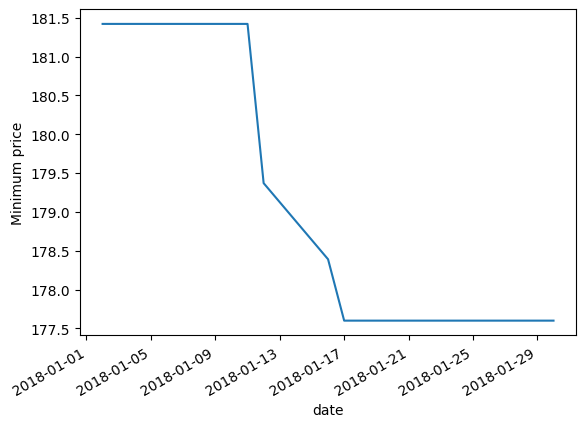

In [191]:
tmp_fb = fb.head(20)

rolling_day = tmp_fb.close.rolling('20D').min().plot()
rolling_day.set_ylabel('Minimum price')

### Create a histogram and KDE of the change from open to close in the Facebook stock price.

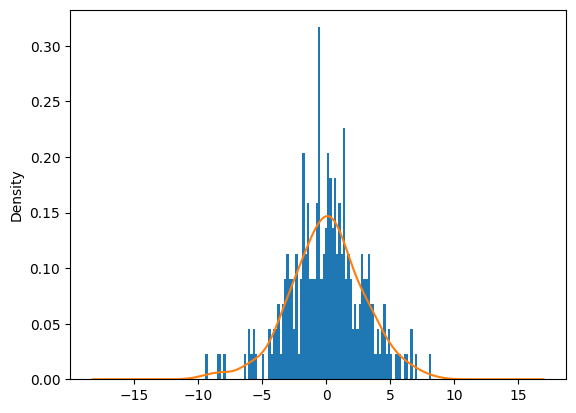

In [192]:
fb['change'] = fb.close - fb.open
fb.change.plot(kind='hist', bins=100, density=True)
fb.change.plot(kind='kde')
plt.show()

### Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia. 

In [193]:
indonesia = eq[eq.place.str.contains('Indonesia')]
indonesia

,mag,magType,place,tsunami,parsed_place
time,,,,,
1537255636260,4.7,mb,"2km ESE of Lokokrangan, Indonesia",0,Indonesia
1537256021950,4.7,mb,"18km NE of Reuleuet, Indonesia",0,Indonesia
1537280181100,4.0,mb,"123km NE of Bitung, Indonesia",0,Indonesia
1537288723310,4.4,mb,"103km W of Kuripan, Indonesia",0,Indonesia
1537296305750,4.3,mb,"7km WSW of Karangsubagan, Indonesia",0,Indonesia
...,...,...,...,...,...
1539258833830,4.4,mb,"51km WSW of Kasiguncu, Indonesia",0,Indonesia
1539331098920,4.7,mb,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
1539405255580,5.2,mww,"25km E of Bitung, Indonesia",0,Indonesia


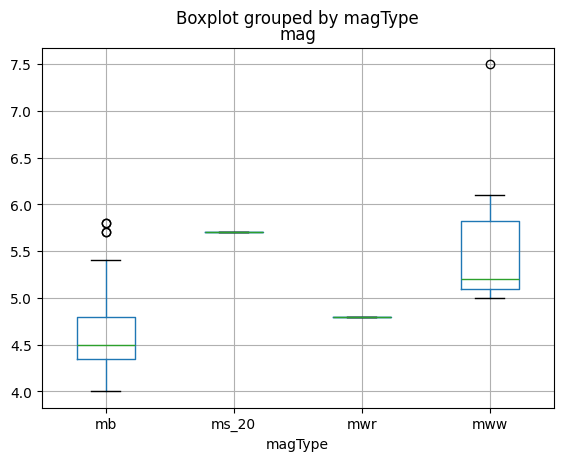

In [194]:
eq[eq.place.str.contains('Indonesia')].boxplot(column='mag', by='magType')
plt.show() 

### Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line

In [195]:
fb['date'] = fb.index
fb_dates = pd.to_datetime(fb['date'])

In [196]:
fb['week'] = fb_dates.dt.isocalendar().week
fb


,open,high,low,close,volume,change,date,week
date,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74,2018-01-02,1
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79,2018-01-03,1
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57,2018-01-04,1
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26,2018-01-05,1
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08,2018-01-08,2
...,...,...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,0.96,2018-12-24,52
2018-12-26,126.00,134.24,125.8900,134.18,39723370,8.18,2018-12-26,52
2018-12-27,132.44,134.99,129.6700,134.52,31202509,2.08,2018-12-27,52


<Axes: xlabel='date'>

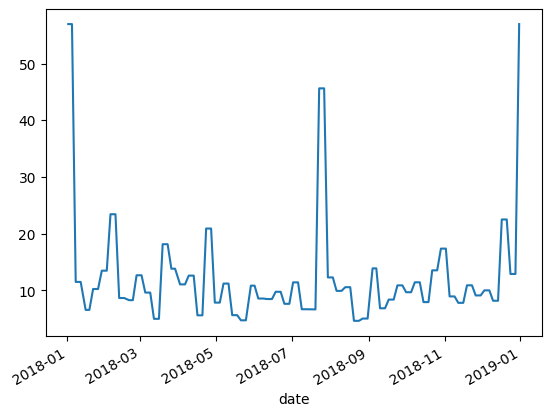

In [197]:
fb['week_high'] = fb.groupby(['week']).high.transform('max')
fb['week_low'] = fb.groupby(['week']).low.transform('min')
(fb.week_high - fb.week_low).plot()

### Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

a. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price.

b. The second subplot will be a bar plot showing the net effect this had monthly, using resample().

c. Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

d. Bonus #2: Modify the x-axis of the bar plot to show the three letter abbreviation for the month.

C:\Users\nigel\AppData\Local\Temp\ipykernel_16176\1192776679.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fb.resample('M').change.sum().plot(kind='bar')


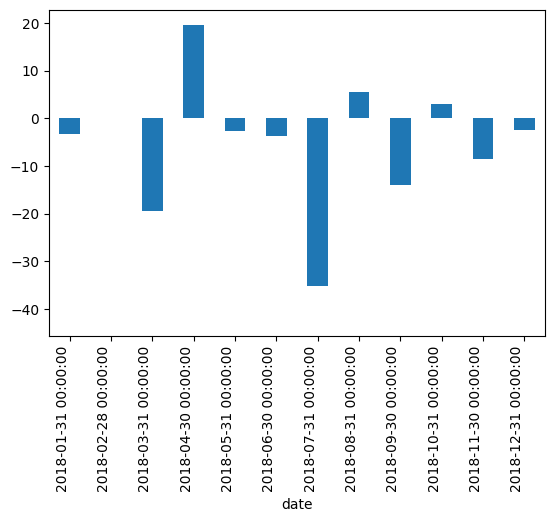

In [198]:
# Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
# The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price.
# The second subplot will be a bar plot showing the net effect this had monthly, using resample().

